<h1 style="text-align:center">
Computer vision: LeNet-5, AlexNet, VGG-16/19, GoogLeNet</h1>

In [0]:
# importing Basic Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, ZeroPadding2D, AveragePooling2D,Reshape, BatchNormalization
from PIL import Image
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# 1 LeNet-5 for MNIST

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

In [0]:
# Loading Dataset 

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

X_train = train_data.reshape(train_data.shape[0], 28, 28, 1).astype('float32')/255
X_test = test_data.reshape(test_data.shape[0], 28, 28, 1).astype('float32')/255


y_train = keras.utils.to_categorical(train_labels, 10)
y_test = keras.utils.to_categorical(test_labels, 10)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
activation_30 (Activation)   (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 4, 4, 120)       

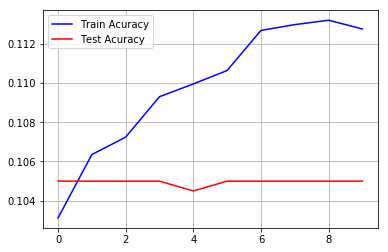

In [0]:
""" Define model """

model = Sequential()

# Layer 1  Conv => MaxPooling => Activation
model.add(Conv2D(6, (5,5), input_shape=(28,28,1), padding="valid", strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("sigmoid"))

# Layer 2
model.add(Conv2D(16, (5,5), activation="sigmoid", padding="valid", strides=(1,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

# Layer 3
model.add(Conv2D(120, (1,1), activation="sigmoid", padding="valid",strides=(1,1)))

#Layer 4
model.add(Flatten())
model.add(Dense(84, activation="sigmoid"))

#Layer 5
model.add(Dense(10, activation="softmax"))

# Info abt Tensors shape after each stage
model.summary()


""" Compile model """
opt = SGD(lr=0.2, momentum=0.1, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# """Train and First model"""
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

print("*"*60)

# Accuracy on test data
_, accuracy = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("Accuracy on test data is : ", accuracy)

# plotting Accuracy

plt.plot(history.history["acc"], label="Train Acuracy", color="blue")
plt.plot(history.history["val_acc"], label="Test Acuracy", color="red")
plt.grid()
plt.legend()
plt.show()

# 2  LeNet-5 with "Distortions" (i.e., Data augmentation)

In [0]:
datagen = ImageDataGenerator(featurewise_center=False, # set input mean to 0 of dataset
                            samplewise_center = False, # set sample input mean to 0
                            zca_whitening = False,   # use whitening effect
                            featurewise_std_normalization= False, # divide the dataset by std of dataset
                            samplewise_std_normalization = False,  # divide each sample by its std
                            width_shift_range = 0.1,  # shifting image to left and right by 10%
                            height_shift_range = 0.1, # shifting image up and below by 10%
                            vertical_flip = False,    # Fliping the image vertically i.e upside down
                            horizontal_flip = False,  # mirror image
                            zoom_range = 0.5,         # zooming in and out by 5%
                            )

datagen.fit(X_train)

In [42]:
"""Define model"""
model = Sequential()

# Layer 1
model.add(Conv2D(6, (5,5), activation="sigmoid", kernel_initializer="he_uniform", padding="valid", strides=1, input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Layer 2
model.add(Conv2D(16, (5,5), activation="sigmoid", strides=1, padding="valid"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.4))
# Layer 3
model.add(Conv2D(120, (1,1), activation="sigmoid", padding="valid", strides=1))

# Layer 4
model.add(Flatten())
model.add(Dense(84, activation="sigmoid"))

# Layer 5
model.add(Dense(10, activation="softmax"))

"""Compile Model"""
opt = SGD(lr=0.01, momentum=0.1, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

"""Train and Fit model"""
model.fit(X_train, y_train, epochs=5, batch_size=128)

"""Accuracy"""

# Test data
_, accuracy = model.evaluate(X_test,y_test, batch_size=128, verbose=0)
print("Accuracy on test data : ", accuracy)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 2.3079 - acc: 0.1078
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 2.3028 - acc: 0.1086
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 2.3028 - acc: 0.1085
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 2.3025 - acc: 0.1097
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 2.3024 - acc: 0.1109
Accuracy on test data :  0.1135


# OverFeat adaptation of AlexNet (2012)

![alt text](https://www.oreilly.com/library/view/hands-on-java-deep/9781789613964/assets/e06f2b94-4735-4cff-a350-59c4a577e55d.png)

In [0]:
from keras.datasets import cifar10

# train data
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [0]:
# Normalizing data

X_train = train_data.astype('float32')/255
X_test = test_data.astype('float32')/255

# Encoding labels
y_train = keras.utils.to_categorical(train_labels, 10)
y_test = keras.utils.to_categorical(test_labels, 10)

In [65]:
# Define Model
model = Sequential()

# Layer 1
model.add(Conv2D(96, (11,11), strides=4, padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Layer 2
model.add(Conv2D(256, (5,5), strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Layer 3
model.add(Conv2D(384, (3,3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
# Layer 4
model.add(Conv2D(384, (3,3), strides=1, padding="same", activation="relu"))      

# Layer 5
model.add(Conv2D(256, (3,3), strides=1, padding="same", activation="relu"))   
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(BatchNormalization())

# Layer 6
model.add(Flatten())
model.add(Dense(9216, activation="relu", kernel_initializer="glorot_normal"))

# Layer 7
model.add(Dense(4096, activation="relu", kernel_initializer="glorot_normal"))

# Layer 8
model.add(Dense(4096, activation="relu", kernel_initializer="glorot_normal"))

# layer 9
model.add(Dense(10, activation="softmax",kernel_initializer="glorot_normal"))

"""Compile Model"""
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

"""Train and Fit model"""
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_split=0.2)

"""Evaluate"""
_,accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("Accuracy on Test data : ", accuracy)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 42s 1ms/step - loss: 1.8631 - acc: 0.3053 - val_loss: 1.6613 - val_acc: 0.3712
Epoch 2/15
40000/40000 [==============================] - 39s 986us/step - loss: 1.5634 - acc: 0.4114 - val_loss: 1.6362 - val_acc: 0.4134
Epoch 3/15
40000/40000 [==============================] - 39s 982us/step - loss: 1.4351 - acc: 0.4660 - val_loss: 1.5993 - val_acc: 0.4329
Epoch 4/15
40000/40000 [==============================] - 39s 981us/step - loss: 1.3455 - acc: 0.5046 - val_loss: 1.3801 - val_acc: 0.5049
Epoch 5/15
40000/40000 [==============================] - 39s 982us/step - loss: 1.2634 - acc: 0.5403 - val_loss: 1.4142 - val_acc: 0.4937
Epoch 6/15
40000/40000 [==============================] - 39s 977us/step - loss: 1.1944 - acc: 0.5667 - val_loss: 1.6083 - val_acc: 0.4703
Epoch 7/15
40000/40000 [==============================] - 39s 978us/step - loss: 1.1189 - acc: 0.5967 - val_loss: 1.36

# VGG16 – Convolutional Network for Classification and Detection

![alt text](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [70]:
"""Define Model"""
model = Sequential()

# Layer 1
model.add(Conv2D(64,(3,3), strides=1, padding="same", activation="relu", input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3), strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D((2,2), strides=2))

# Layer 2
model.add(Conv2D(128, (3,3),strides=1,padding="same", activation="relu" ))
model.add(Conv2D(128, (3,3),strides=1,padding="same", activation="relu" ))
model.add(MaxPooling2D((2,2), strides=2))

# Layer 3
model.add(Conv2D(256, (3,3),strides=1,padding="same", activation="relu" ))
model.add(Conv2D(256, (3,3),strides=1,padding="same", activation="relu" ))
model.add(Conv2D(256, (3,3),strides=1,padding="same", activation="relu" ))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

# Layer 4
model.add(Conv2D(512, (3,3),strides=1,padding="same", activation="relu" ))
model.add(Conv2D(512, (3,3),strides=1,padding="same", activation="relu" ))
model.add(Conv2D(512, (3,3),strides=1,padding="same", activation="relu" ))
model.add(MaxPooling2D((2,2), strides=2))

# Layer 5
model.add(Conv2D(1024, (3,3),strides=1,padding="same", activation="relu" ))
model.add(Conv2D(1024, (3,3),strides=1,padding="same", activation="relu" ))
model.add(Conv2D(1024, (3,3),strides=1,padding="same", activation="relu" ))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

# Layer 6
model.add(Flatten())
model.add(Dense(4096, activation="relu"))

# Layer 7
model.add(Dense(4096, activation="relu"))

# Layer 8
model.add(Dense(10, activation="softmax"))

"""Compile Model"""
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

"""Train and fit model"""
model.fit(X_train, y_train, epochs=10, batch_size=1000)

"""Evaluate"""
_,accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy on Test data : ", accuracy)

          

Epoch 1/10
50000/50000 [==============================] - 59s 1ms/step - loss: 2.3253 - acc: 0.1483
Epoch 2/10
50000/50000 [==============================] - 55s 1ms/step - loss: 1.7383 - acc: 0.2946
Epoch 3/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.4962 - acc: 0.4063
Epoch 4/10
50000/50000 [==============================] - 55s 1ms/step - loss: 1.2227 - acc: 0.5393
Epoch 5/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.9994 - acc: 0.6331
Epoch 6/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.8351 - acc: 0.6990
Epoch 7/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7107 - acc: 0.7455
Epoch 8/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6250 - acc: 0.7801
Epoch 9/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.5293 - acc: 0.8120
Epoch 10/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.4580 - acc: 0.8395